In [29]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os

from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

load_dotenv()

True

In [13]:
API_KEY = os.getenv("API_KEY")
quandl.ApiConfig.api_key = API_KEY

In [14]:
df = quandl.get("WIKI/MSFT")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


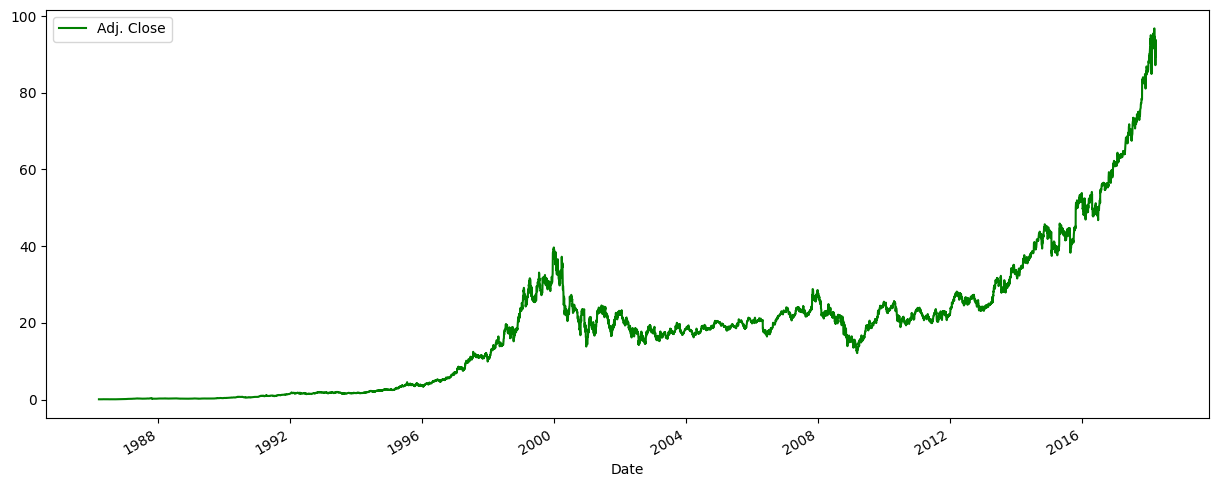

In [15]:
df = df[["Adj. Close"]]
df["Adj. Close"].plot(figsize=(15, 6), color="g")
plt.legend(loc="upper left")
plt.show()

In [16]:
forecast = 30
df["Prediction"] = df[["Adj. Close"]].shift(-forecast)
df

,Adj. Close,Prediction
Date,,
1986-03-13,0.064720,0.078011
1986-03-14,0.067031,0.078589
1986-03-17,0.068187,0.076277
1986-03-18,0.066454,0.074544
1986-03-19,0.065298,0.073388
...,...,...
2018-03-21,92.480000,NaN
2018-03-22,89.790000,NaN
2018-03-23,87.180000,NaN


In [18]:
X = np.array(df.drop("Prediction", axis=1))
X = preprocessing.scale(X)
X

array([[-1.05314544],
       [-1.05301529],
       [-1.05295022],
       ...,
       [ 3.85203428],
       [ 4.22365893],
       [ 3.98097677]])

In [23]:
print(X.mean())
print(X.std())

2.2523395289076974e-16
0.9999999999999999


In [24]:
X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df["Prediction"])
y = y[:-forecast]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [26]:
confidence = clf.score(X_test, y_test)
confidence

0.9862223664219005

In [27]:
forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[91.91182784 92.91573286 94.81085969 94.13476039 94.87232326 93.61232002
 93.86841824 96.24500972 97.63818403 96.38842472 95.94793578 95.00549433
 95.21037291 95.81476471 95.48695899 96.04013114 96.62403508 98.78550405
 99.02111441 96.60354722 96.02988721 96.36793686 96.79818187 95.04647005
 95.29232434 94.62646897 91.87085213 89.19718672 95.95817971 91.54304641]


Text(0.5, 1.0, 'Predicted 30 Day Forecast of MSFT Adj. Closing Price (2018)')

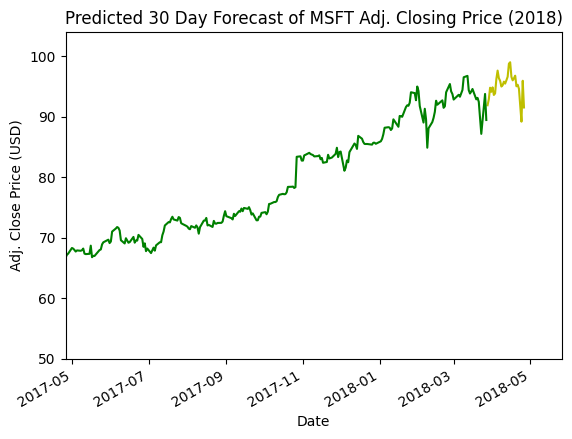

In [46]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color="y")
df["Adj. Close"].plot(color="g")
plt.xlim(xmin=datetime.date(2017, 4, 26), xmax=datetime.date(2018, 5, 26))
plt.ylim(ymin=50)
plt.ylabel("Adj. Close Price (USD)")
plt.title("Predicted 30 Day Forecast of MSFT Adj. Closing Price (2018)")